In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.utils.data as data
# import tensorflow as tf
# from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Dense
from sklearn import preprocessing

from sklearn.model_selection import *
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
import seaborn as sns
from scipy import stats

## **Exploratory Data Analysis**

In [ ]:
data = pickle.load(open(r'/content/deltaQ_cycles_v3.pkl', 'rb'))
data2 = pickle.load(open(r'/content/temp_features.pkl', 'rb'))

In [ ]:
df = pd.DataFrame(data)
df = df.T
df

,cycle_life,DeltaQ_logVars,DeltaQ_mins,DeltaQ_means,DeltaT_max,DeltaT_logVars,DeltaIR
b1c0,1852.0,"[-5.312397783990413, -6.083994961532522, -5.18...","[-0.008240395988927805, -0.0002242341749867683...","[0.0004857428370437458, 0.00125113988300626, 0...","[-0.012389999999996348, 0.035713000000001216, ...","[-1.9881162501132235, -2.7181121118223963, -2....","[-4.306399999999891e-05, -6.244199999999936e-0..."
b1c1,2160.0,"[-5.344830628831667, -5.439216236809741, -5.16...","[-0.00432735462716327, -0.004458660307576208, ...","[0.0003726826150039431, 0.0015934313381018713,...","[0.2889589999999984, 0.17678799999999484, 0.20...","[-1.6111407618998372, -2.281788262668073, -1.8...","[-8.139899999999936e-05, -9.45400000000006e-05..."
b1c2,2237.0,"[-5.489668172937059, -5.6467550579622, -5.2868...","[-0.004304080500288299, -0.0032179659895331227...","[0.0003293821672540132, 0.0014632261885215785,...","[0.30951999999999913, 0.18937299999999624, 0.2...","[-1.4958770510032218, -2.146562363786118, -1.6...","[-0.00011295799999999981, -0.00011657200000000..."
b1c3,1434.0,"[-5.272649102763021, -5.427970306360354, -5.05...","[-0.0028570076337987565, -0.002114717791624455...","[0.0009878154531647756, 0.0015790925931035184,...","[-0.40435799999999844, -0.08317399999999964, -...","[-0.9266008864992038, -1.5966558182778428, -1....","[9.926000000000379e-06, 9.441999999998396e-06,..."
b1c4,1709.0,"[-5.6797028144354496, -5.563698811619805, -5.3...","[-0.0008590741949457948, -0.002204777920881737...","[0.0010893794834235966, 0.0016430508816848257,...","[-0.2077820000000017, -0.08847399999999794, -0...","[-1.724559802612215, -1.9553147086278513, -1.8...","[-1.5950000000000686e-06, -2.033299999999738e-..."
...,...,...,...,...,...,...,...
b3c39,1156.0,"[-5.105482962223203, -5.017338483061545, -5.02...","[-0.010894729536144607, -0.011787709566672987,...","[0.0004469222845277273, 0.0009143767316177368,...","[-0.08394276625630681, -0.11817576625630721, -...","[-2.446514149131019, -2.7335857239579773, -2.5...","[-1.6073000000001864e-05, -0.00010440300000000..."
b3c40,796.0,"[-5.226655617269972, -5.511814547940238, -5.30...","[-0.004057331993564728, -0.002638208129922096,...","[0.0009176807162887679, 0.0016223933453947956,...","[-0.05785330548632572, -0.069861351497984, -0....","[-2.9900936979624775, -2.7669133351679474, -2....","[-1.9289999999999932e-05, -3.857000000000166e-..."
b3c41,786.0,"[-6.026736086410441, -5.113981992883326, -5.34...","[-0.001561025426189433, -0.001779113057880366,...","[0.0008297075912756135, 0.001980606967077966, ...","[-0.03301541631560667, -0.10398741631561137, -...","[-2.923841380490041, -2.3799555893179707, -2.7...","[-3.724399999999878e-05, -5.12439999999989e-05..."
b3c44,940.0,"[-5.675020915160977, -5.534075831837039, -5.45...","[-0.004161323073706958, -0.004370824511735538,...","[0.0005364604508535664, 0.001036508644240508, ...","[-0.041370577581894, -0.1062051569976461, -0.0...","[-2.835719963375267, -2.8405686889629194, -2.7...","[-2.886900000000081e-05, -3.7844000000002154e-..."


In [ ]:
df.shape

(124, 7)

In [ ]:
data['b1c0'].keys()

dict_keys(['cycle_life', 'DeltaQ_logVars', 'DeltaQ_mins', 'DeltaQ_means', 'DeltaT_max', 'DeltaT_logVars', 'DeltaIR'])

In [ ]:
n_cycles = 98
cut_start = 1

features = [
    "DeltaQ_logVars",
    "DeltaQ_mins",
    # "DeltaQ_means",
    # "Delta_Tmax",
    # "DeltaT_var",
]

n_cycles = n_cycles - cut_start
y = np.zeros(124)
x = np.zeros((124, n_cycles*len(features)))

for i, cell in enumerate(data.keys()):
    for j, feature in enumerate(features):
        if feature in list(data["b1c0"].keys()):
            x[i, j*n_cycles:(j+1)*n_cycles] = data[cell][feature][cut_start:]
        else:
            x[i, j*n_cycles:(j+1)*n_cycles] = data2[cell][feature][cut_start:]
    y[i] = np.log10(data[cell]["cycle_life"])

# convert to tensors and concatenate features and labels
x = torch.Tensor(x)
y = torch.Tensor(y)

In [ ]:
x.size()

torch.Size([124, 194])

Correlation of Features

In [ ]:
def extract_features(arr):
    # Example: Extract the mean from the array
    return np.mean(arr)

In [ ]:
for column in df.columns:
  df[column+"_mean"] = df[column].apply(extract_features)

In [ ]:
filtered_columns = filtered_columns = df.filter(regex=r'^((?!mean).)*_mean$')
filtered_columns

,cycle_life_mean,DeltaQ_logVars_mean,DeltaQ_mins_mean,DeltaT_max_mean,DeltaT_logVars_mean,DeltaIR_mean
b1c0,1852.0,-5.069958,-0.004854,-0.322407,-2.232471,-0.000083
b1c1,2160.0,-5.102665,-0.004307,-0.263206,-1.960226,-0.000262
b1c2,2237.0,-5.155971,-0.006267,-0.248757,-1.892774,-0.000235
b1c3,1434.0,-5.027247,-0.007063,-0.531634,-1.771490,-0.000171
b1c4,1709.0,-5.116759,-0.005223,-0.254206,-2.107392,-0.000243
...,...,...,...,...,...,...
b3c39,1156.0,-4.491814,-0.011702,0.116254,-2.293159,-0.000156
b3c40,796.0,-4.610733,-0.006035,0.398860,-2.180034,-0.000163
b3c41,786.0,-4.514476,-0.007839,0.262394,-2.425706,-0.000207
b3c44,940.0,-4.742333,-0.009076,0.245223,-2.399968,-0.000113


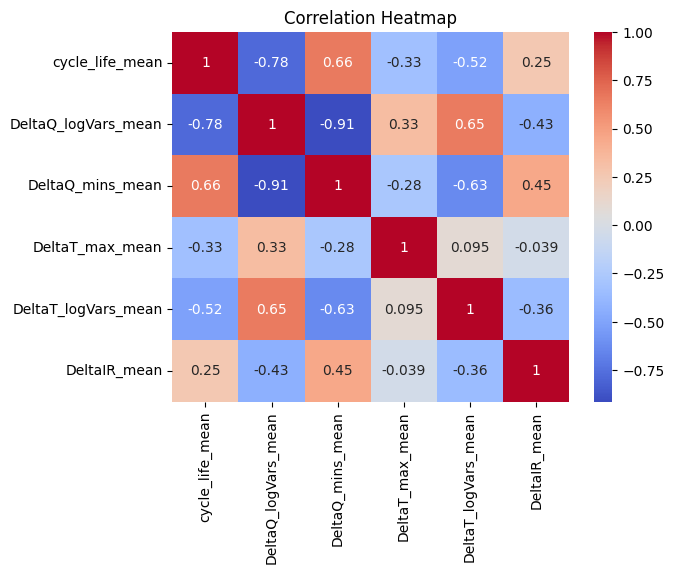

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
correlation_matrix = filtered_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title and adjust the figure size if needed
plt.title('Correlation Heatmap')
plt.figure(figsize=(8, 6))

# Display the heatmap
plt.show()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

## **AutoEncoder: Dimensionality Reduction**

### **Train Test Split**

In [ ]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])


In [ ]:
plt.rcParams["figure.figsize"] = (18,7)

class AutoEncoder_ElasticNet(nn.Module):
    def __init__(self, n_features, n_cycles=49, alpha=0.5):
        super(AutoEncoder_ElasticNet, self).__init__()

        self.alpha = alpha
        self.n_features = n_features
        self.n_cycles = n_cycles

        self.encoder = nn.Sequential(
            nn.Linear(n_features*n_cycles, n_features*32),
            nn.ReLU(),
            nn.Linear(n_features*32, n_features*16),
            # nn.ReLU(),
            # nn.Linear(n_features*16, n_features*8),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            # nn.Linear(n_features*8, n_features*16),
            # nn.ReLU(),
            nn.Linear(n_features*16, n_features*32),
            nn.ReLU(),
            nn.Linear(n_features*32, n_features*n_cycles)
        )

        self.prediction = nn.Linear(n_features*16, 1)

    def elastic_net_loss(self):

        l1_norm = self.prediction.weight.abs().sum()
        l2_norm = self.prediction.weight.pow(2).sum()

        return (1-self.alpha)/2 * l2_norm + self.alpha * l1_norm

    def elastic_net_predict(self, x):
        return self.prediction(self.encoder(x))

    def forward(self, x):
        self.eval()
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def evaluate(self, x, y):
        mses = [0.0, 0.0, 0.0]
        for i in train_ind:
            mses[0] += (10**self.elastic_net_predict(x[i]).detach().numpy() - 10**y[i].detach().numpy())**2
        for i in test_ind:
            mses[1] += (10**self.elastic_net_predict(x[i]).detach().numpy() - 10**y[i].detach().numpy())**2
        for i in secondary_ind:
            mses[2] += (10**self.elastic_net_predict(x[i]).detach().numpy() - 10**y[i].detach().numpy())**2

        mses[0] = np.sqrt(mses[0] / len(train_ind))
        mses[1] = np.sqrt(mses[1] / len(test_ind))
        mses[2] = np.sqrt(mses[2] / len(secondary_ind))

        for mse, label in zip(mses, ["train", "test", "sec"]):
            print(label, "\t", mse[0])


    def plotter(self, x, y, id):
        fig, axs = plt.subplots(1, 2)
        for i in range(self.n_features):
            axs[0].plot(x[id].detach().numpy()[i*self.n_cycles:(i+1)*self.n_cycles],
                        self.forward(x[id]).detach().numpy()[i*self.n_cycles:(i+1)*self.n_cycles], ".", label = "feature {}".format(i+1))
        axs[0].plot(np.linspace(-5.5, 1.5, 3), np.linspace(-5.5, 1.5, 3), "k", alpha = 0.5)

        axs[0].legend()
        axs[0].set_xlabel("True input")
        axs[0].set_ylabel("Decoded input")
        axs[0].set_title("Decoder performance, cell "+str(id))

        axs[1].plot(y[train_ind], self.elastic_net_predict(x[train_ind]).detach().numpy(), ".", label = "train")
        axs[1].plot(y[test_ind], self.elastic_net_predict(x[test_ind]).detach().numpy(), ".", label = "test")
        axs[1].plot(y[secondary_ind], self.elastic_net_predict(x[secondary_ind]).detach().numpy(), ".", label = "secondary")
        axs[1].plot(np.linspace(2.15, 3.4, 3), np.linspace(2.15, 3.4, 3), "k", alpha = 0.5)

        axs[1].legend()
        axs[1].set_xlabel("True input")
        axs[1].set_ylabel("Decoded input")
        axs[1].set_title("Prediction performance")

        plt.show()

    def fit(self, x, y, train_policy, verbose = True, plots = True, log_loss = False):

        self.train()
        loss_function = nn.MSELoss()
        train_data = TensorDataset(torch.Tensor(x[train_ind]),torch.Tensor(y[train_ind]))

        num_stages = train_policy["num_stages"]
        for stage in range(num_stages):

            if verbose: print("\nStage {}:\n".format(stage+1))

            epochs = train_policy["epochs"][stage]
            lr = train_policy["learning_rates"][stage]
            batch_size = train_policy["batch_sizes"][stage]
            prediction_weight = train_policy["prediction_weights"][stage]
            decoding_weight = train_policy["decoding_weights"][stage]
            en_weight = train_policy["decoding_weights"][stage]

            train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
            optimiser = torch.optim.Adam(self.parameters(), lr=lr)

            for ep in range(epochs):
                for batch in train_loader:

                    train_inputs, train_labels = batch
                    outputs = self.forward(train_inputs)
                    predictions = self.elastic_net_predict(train_inputs)

                    if log_loss:
                        loss = loss_function(train_labels, predictions[:, 0])*prediction_weight
                    else:
                        loss = loss_function(10**train_labels, 10**predictions[:, 0])*prediction_weight
                    loss += self.elastic_net_loss()*en_weight + loss_function(train_inputs, outputs)*decoding_weight

                    optimiser.zero_grad()
                    loss.backward()
                    optimiser.step()

                if verbose:
                    if (ep+1) % int(epochs / 10) == 0: print(f"Epoch {ep+1}/{epochs}, loss: {loss.item():.2f}")

            if verbose: self.evaluate(x, y)
            if plots:
                self.plotter(x, y, 30)



Stage 1:

Epoch 300/3000, loss: 2031.34
Epoch 600/3000, loss: 1845.60
Epoch 900/3000, loss: 1656.84
Epoch 1200/3000, loss: 1476.80
Epoch 1500/3000, loss: 1302.85
Epoch 1800/3000, loss: 1132.01
Epoch 2100/3000, loss: 968.64
Epoch 2400/3000, loss: 824.93
Epoch 2700/3000, loss: 695.06
Epoch 3000/3000, loss: 599.81
train 	 76.76688
test 	 87.904236
sec 	 279.63382


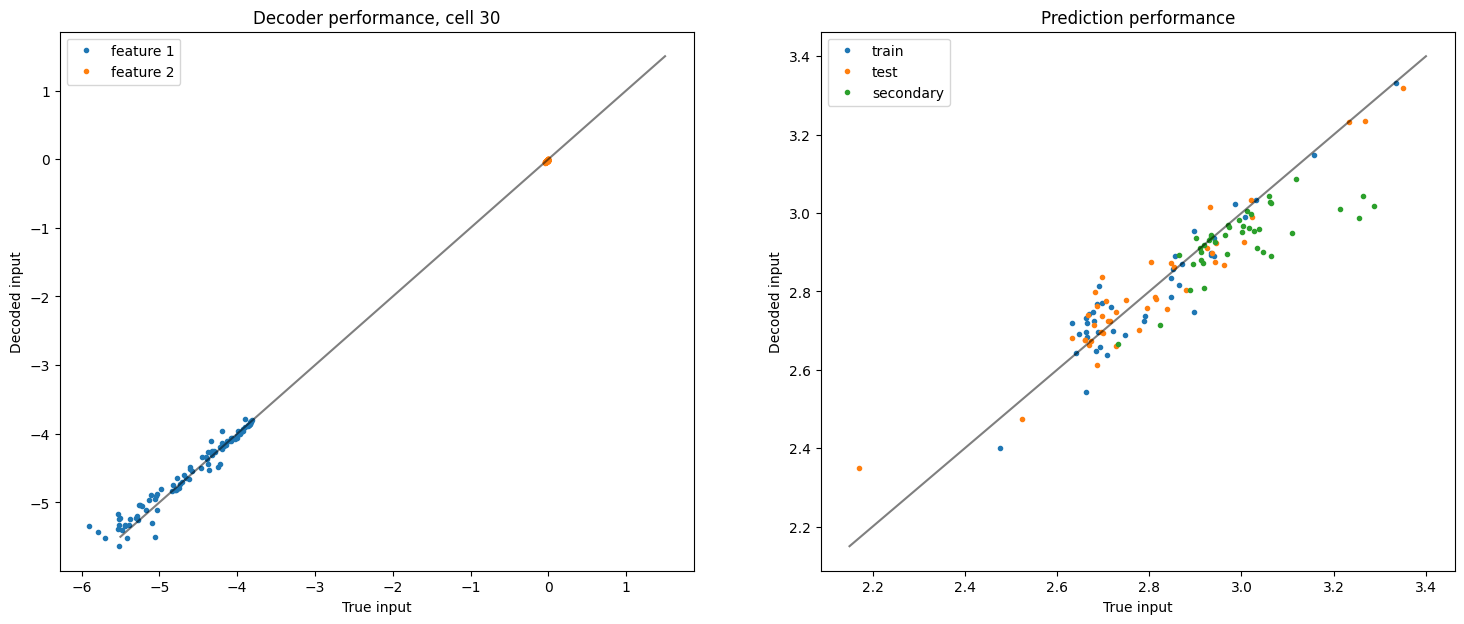


Stage 2:

Epoch 100/1000, loss: 1.59
Epoch 200/1000, loss: 1.56
Epoch 300/1000, loss: 1.53
Epoch 400/1000, loss: 1.50
Epoch 500/1000, loss: 1.47
Epoch 600/1000, loss: 1.44
Epoch 700/1000, loss: 1.41
Epoch 800/1000, loss: 1.38
Epoch 900/1000, loss: 1.35
Epoch 1000/1000, loss: 1.33
train 	 63.686817
test 	 93.25762
sec 	 302.40048


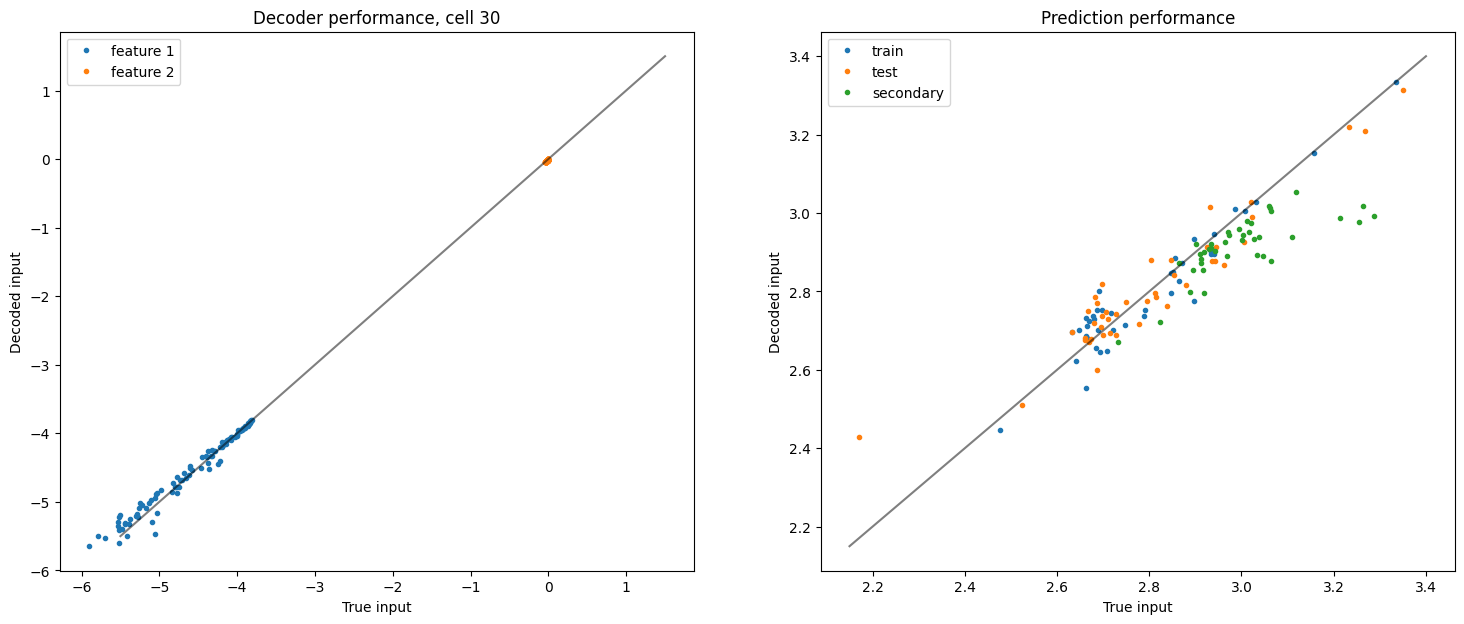

In [ ]:
train_policy = {
    "num_stages": 2,
    "epochs": [3000, 1000],
    "learning_rates": [3e-5, 1e-5],
    "batch_sizes": [64, 64],
    "prediction_weights": [0.1, 0.0001],
    "decoding_weights": [10, 1],
    "en_weights": [1, 1]
}

model = AutoEncoder_ElasticNet(n_features=2, n_cycles=97)
train = TensorDataset(torch.Tensor(x[train_ind]),torch.Tensor(y[train_ind]))
model.fit(x,y,train_policy)

In [ ]:
model.encoder(x[5])

tensor([2.2421, 3.4333, 3.3160, 0.0000, 0.0000, 0.0000, 2.6696, 0.6420, 0.0000,
        0.0000, 0.7666, 0.8180, 1.1249, 0.0000, 0.9111, 0.0000, 0.0000, 4.3404,
        0.3175, 4.4630, 0.0000, 0.0000, 0.0000, 0.3987, 0.0000, 2.2399, 0.0000,
        0.0000, 5.5984, 3.3639, 2.6583, 0.0000], grad_fn=<ReluBackward0>)

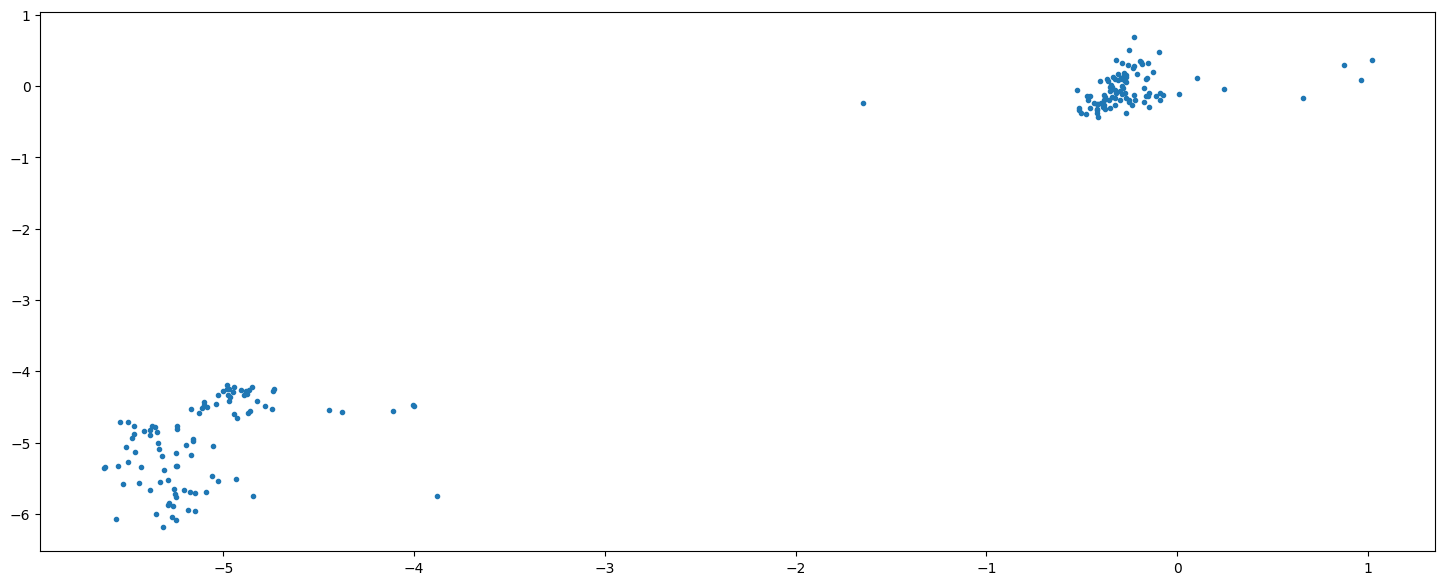

In [ ]:
plt.plot(x[4].detach().numpy(), model.forward(x[4]).detach().numpy(), ".")

In [ ]:
print(y[1], model.elastic_net_predict(x[1]))

tensor(3.3345) tensor([3.3339], grad_fn=<AddBackward0>)


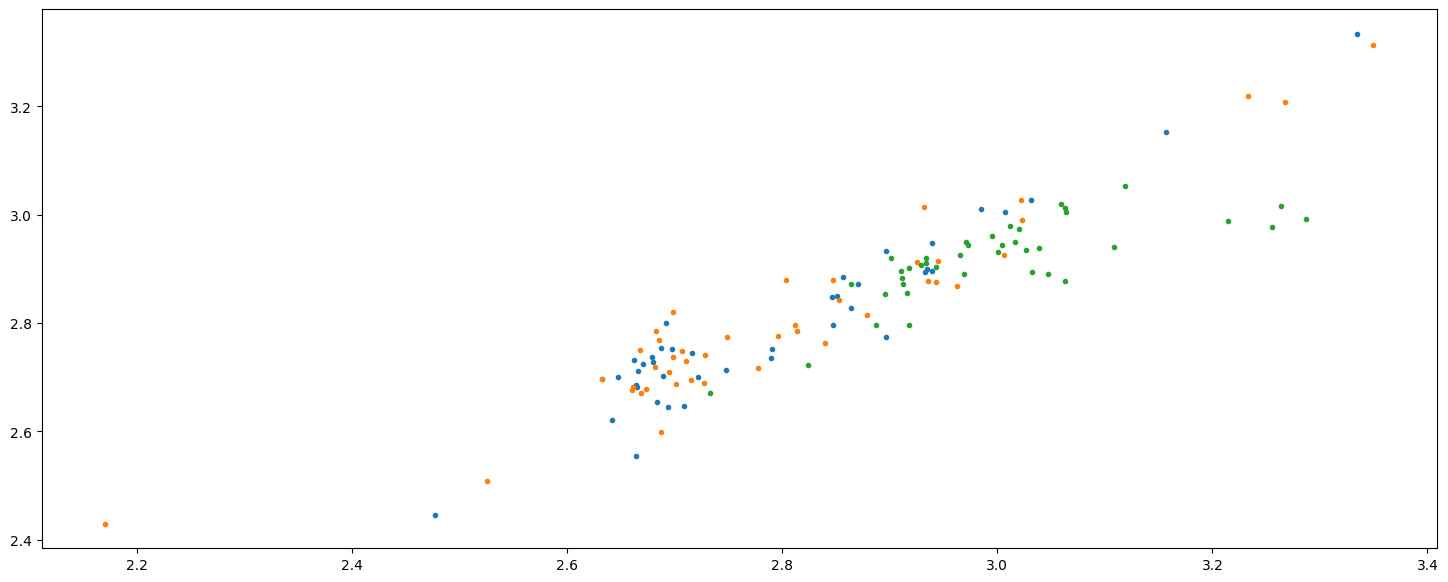

In [ ]:
plt.plot(y[train_ind], model.elastic_net_predict(x[train_ind]).detach().numpy(), ".")
plt.plot(y[test_ind], model.elastic_net_predict(x[test_ind]).detach().numpy(), ".")
plt.plot(y[secondary_ind], model.elastic_net_predict(x[secondary_ind]).detach().numpy(), ".")

## **SVR**

In [ ]:
x_t = model.encoder(x[train_ind]).detach().numpy()
x_te = model.encoder(x[test_ind]).detach().numpy()
x_ste = model.encoder(x[secondary_ind]).detach().numpy()

scaler = preprocessing.StandardScaler().fit(list(x_t))
x_t = scaler.transform(list(x_t))
x_te = scaler.transform(list(x_te))
x_ste = scaler.transform(list(x_ste))

In [ ]:
x_t.shape

(41, 32)

In [ ]:
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)
regressor = SVR()

param_grid = {'C': np.logspace(-5, 1, base=10, num=1000),
              'kernel': ['linear','rbf', 'sigmoid'],
              'gamma': np.logspace(-5, 0, base=10, num=50),  #changed from -5,1
              'epsilon': np.logspace(-5, 1, base=10, num=50)} #changed from #-5,1
print(y[train_ind])
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_t, y[train_ind].detach().numpy())

tensor([3.3345, 3.1565, 3.0310, 2.9395, 2.8965, 2.8567, 2.9330, 2.8965, 2.7474,
        3.0073, 2.9395, 2.9345, 2.8506, 2.8639, 2.8704, 2.8476, 2.7903, 2.9850,
        2.8463, 2.7896, 2.4771, 2.6415, 2.6474, 2.7084, 2.6785, 2.6839, 2.6937,
        2.6637, 2.6893, 2.7218, 2.6637, 2.6702, 2.6972, 2.6920, 2.7160, 2.6656,
        2.6794, 2.6618, 2.6325, 2.6646, 2.6875])
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=20000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=20000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19695570e-05,...
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00]),
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [ ]:
regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_t, y[train_ind].detach().numpy())

SVR(C=0.00595353313081437, epsilon=0.03556480306223128,
    gamma=0.0005428675439323859, kernel='linear')

In [ ]:
train_predictions = []
train_labels = []
test_predictions = []
test_labels = []
stest_predictions = []
stest_labels = []

for i in range(len(train_ind)):
    input, label = x_t[i], y[train_ind[i]].detach().numpy()
    train_predictions.append(np.power(10, regressor.predict(input.reshape(1, -1)))[0])
    train_labels.append(np.power(10, label))

# Loop for test data
for i in range(len(train_ind)):
    input, label = x_te[i], y[test_ind[i]].detach().numpy()
    test_predictions.append(np.power(10, regressor.predict(input.reshape(1, -1)))[0])
    test_labels.append(np.power(10, label))

# Loop for secondary test data
for i in range(len(secondary_ind)):
    input, label = x_ste[i], y[secondary_ind[i]].detach().numpy()
    stest_predictions.append(np.power(10, regressor.predict(input.reshape(1, -1)))[0])
    stest_labels.append(np.power(10, label))

In [ ]:
# print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,reduced_train_tensor.detach().numpy())-
#                                                np.power(10,y[train_ind].detach().numpy()))**2) ))
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10, regressor.predict(x_t)) - np.power(10, y[train_ind].detach().numpy()))**2)))
print("RMSE on Test Data: ", np.sqrt(np.mean((np.power(10, regressor.predict(x_te)) - np.power(10, y[test_ind].detach().numpy()))**2)))
print("RMSE on Secondary Test Data: ", np.sqrt(np.mean((np.power(10, regressor.predict(x_ste)) - np.power(10, y[secondary_ind].detach().numpy()))**2)))

RMSE on Train Data:  62.66043586202697
RMSE on Test Data:  90.13906544612415
RMSE on Secondary Test Data:  289.7465807095779


In [ ]:
y[train_ind].detach().numpy()

array([3.3344538, 3.1565492, 3.0310042, 2.9395192, 2.8965263, 2.8567288,
       2.9329808, 2.8965263, 2.7474117, 3.007321 , 2.9395192, 2.9344985,
       2.8506463, 2.8639174, 2.870404 , 2.8475726, 2.790285 , 2.9849772,
       2.846337 , 2.7895808, 2.4771214, 2.641474 , 2.647383 , 2.708421 ,
       2.6785183, 2.683947 , 2.693727 , 2.6637008, 2.689309 , 2.7218106,
       2.6637008, 2.670246 , 2.6972294, 2.691965 , 2.7160034, 2.665581 ,
       2.6794279, 2.6618128, 2.6324573, 2.6646419, 2.6875288],
      dtype=float32)

In [ ]:
regressor.predict(x_t)

array([3.36338068, 3.15964167, 2.97682543, 2.9739913 , 2.93249716,
       2.86292121, 2.91817909, 2.79487979, 2.75462987, 3.00252302,
       2.89704793, 2.89198387, 2.84156854, 2.828831  , 2.86213731,
       2.79749908, 2.75719054, 2.99760771, 2.86916867, 2.74812917,
       2.51309217, 2.61578222, 2.68896748, 2.64826824, 2.73227879,
       2.6581617 , 2.65764564, 2.58693923, 2.68587686, 2.68930513,
       2.68306499, 2.72824303, 2.73288712, 2.78249779, 2.74008546,
       2.70568955, 2.71460426, 2.71945432, 2.68188422, 2.67984929,
       2.73024387])

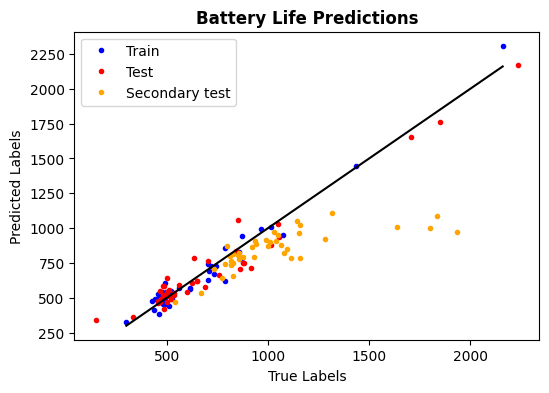

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(train_labels, train_predictions, ".", color="blue", label="Train")
plt.plot(test_labels, test_predictions, ".", color="red", label="Test")
plt.plot(stest_labels, stest_predictions, ".", color="orange", label="Secondary test")
plt.plot(np.linspace(min(train_labels), max(train_labels)), np.linspace(min(train_labels), max(train_labels)), color="black")


plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Battery Life Predictions", fontweight="semibold")
plt.legend()
plt.show()



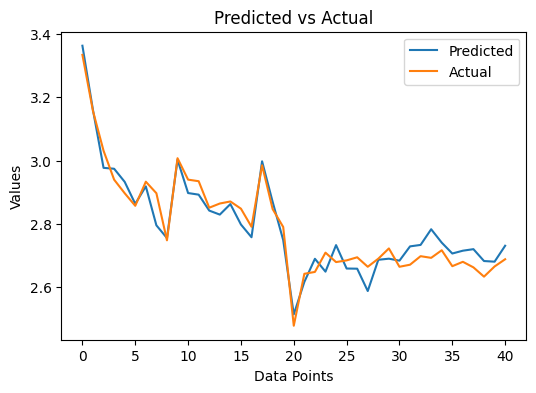

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(regressor.predict(x_t), label='Predicted')
# Plotting the actual values
plt.plot(y[train_ind].detach().numpy(), label='Actual')

# Adding labels and title to the plot
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Predicted vs Actual')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

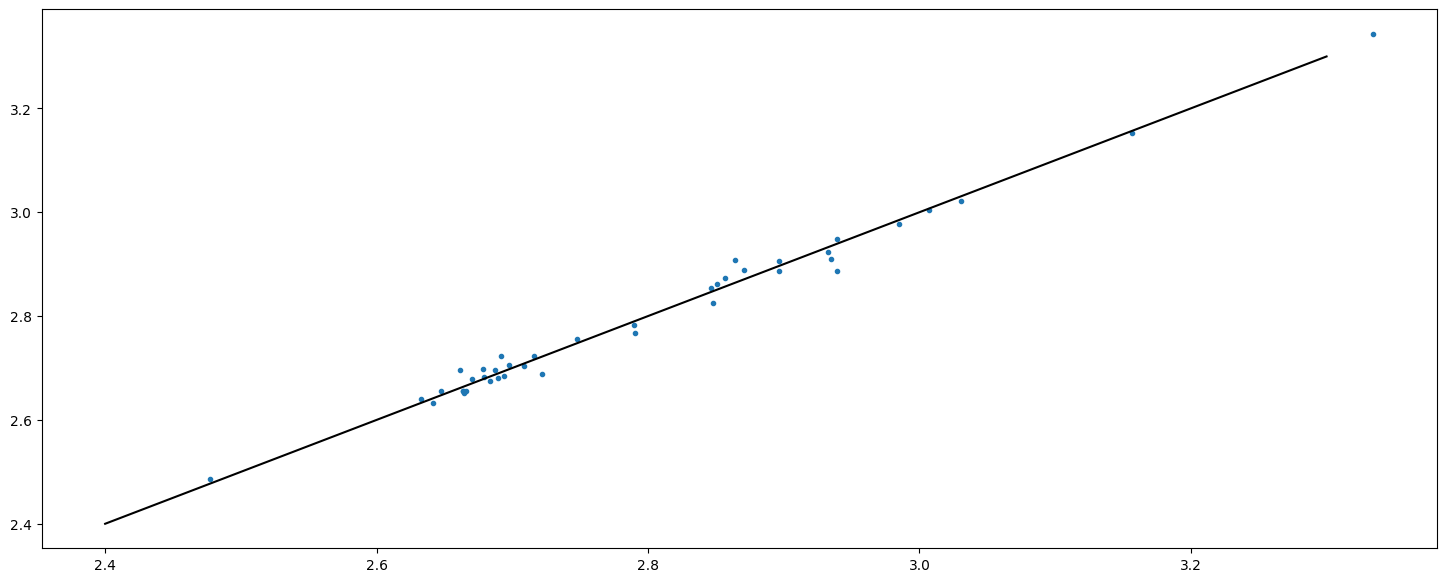

In [ ]:
plt.plot(y[train_ind].detach().numpy(), regressor.predict(x_t), ".")
plt.plot(np.linspace(2.4, 3.3, 3), np.linspace(2.4, 3.3, 3), "k")